In [26]:
#load images
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
#Code for converting .jpg images to .jpeg
from PIL import Image
import os

# Define the directory path containing PNG images
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']

for dir in dirs:
    directory_path = f"raw_data/training-data/{dir}"
    
    # Iterate through the directory and convert images
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".jpg"):
                # Load the image
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                
                # Convert the image to RGB mode
                img = img.convert("RGB")
                
                # Define the new file path with the .jpeg extension
                new_img_path = os.path.splitext(img_path)[0] + ".jpeg"
                
                # Save the image in JPEG format
                img.save(new_img_path, "JPEG")
                
                # Close the image to free resources
                img.close()
    
    print("Image format conversion complete.")

In [ ]:
# Define the directory path
# Define the directory path containing PNG images
dirs = ['clean', 'dust','bird','electrical', 'physical_damaged','solar']

for dir in dirs:
    directory_path = f"raw_data/training-data/{dir}"

    # Iterate through the directory and delete JPG files
    for root, dirs, files in os.walk(directory_path):
        for file in files:
            if file.lower().endswith(".jpg"):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")
    
    print("Deletion complete.")

In [ ]:
# Define the directory path
directory_path = "raw_data/training-data/clean"

# Iterate through the directory and delete Zone.Identifier files
for root, dirs, files in os.walk(directory_path):
    for file in files:
        if file.lower() == "zone.identifier":
            file_path = os.path.join(root, file)
            os.remove(file_path)
            print(f"Deleted: {file_path}")

print("Deletion of Zone.Identifier files complete.")

In [2]:
import os

# Define the directory path
directory_path = "raw_data/training-data"

# List all files in the directory
file_list = []

for root, dirs, files in os.walk(directory_path):
    for file in files:
        file_path = os.path.join(root, file)
        file_list.append(file_path)

# Print the list of file paths
for file_path in file_list:
    print(file_path)
print(len(file_list))    


raw_data/training-data/electrical/Electrical (59).jpeg
raw_data/training-data/electrical/Electrical (64).jpeg
raw_data/training-data/electrical/Electrical (1).png
raw_data/training-data/electrical/Electrical (2).jpeg
raw_data/training-data/electrical/Electrical (18).jpeg
raw_data/training-data/electrical/Electrical (64).jpg:Zone.Identifier
raw_data/training-data/electrical/Electrical (33).jpg:Zone.Identifier
raw_data/training-data/electrical/Electrical (39).jpg:Zone.Identifier
raw_data/training-data/electrical/Electrical (36).jpeg
raw_data/training-data/electrical/Electrical (54).jpg:Zone.Identifier
raw_data/training-data/electrical/Electrical (24).jpeg
raw_data/training-data/electrical/Electrical (32).jpg:Zone.Identifier
raw_data/training-data/electrical/Electrical (37).jpeg
raw_data/training-data/electrical/Electrical (65).jpeg
raw_data/training-data/electrical/Electrical (41).jpg:Zone.Identifier
raw_data/training-data/electrical/Electrical (66).JPG:Zone.Identifier
raw_data/training-

In [53]:
batch_size = 32
train_data_dir = "raw_data/training-data/"
test_data_dir = "raw_data/test-data/"

train_ds = image_dataset_from_directory(
  train_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(225, 225),
  batch_size=batch_size,
crop_to_aspect_ratio=True)

# We define a second one for the test data

val_ds = image_dataset_from_directory(
  test_data_dir,
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(225, 225),
  batch_size=batch_size,
  crop_to_aspect_ratio=True,
)

Found 636 files belonging to 6 classes.
Found 268 files belonging to 6 classes.


In [52]:
#for file_paths, _ in train_ds:
#    for file_path in file_paths:
#        print("File Path:", file_path)

In [54]:
class_names = train_ds.class_names
print(class_names)

['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']


In [55]:
# We'll use a model with the same convolutional layers, but we'll add Augmentation layers before that

model_2 = Sequential()

model_2.add(layers.Rescaling(1./255, input_shape = (225, 225, 3)))

# Data Augmentation Layers

model_2.add(layers.RandomFlip("horizontal"))
model_2.add(layers.RandomZoom(0.1))
model_2.add(layers.RandomTranslation(0.2, 0.2))
model_2.add(layers.RandomRotation(0.1))


# Convolutional Layers

model_2.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation="relu", padding = "same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model_2.add(layers.Conv2D(filters = 32, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )


model_2.add(layers.Conv2D(filters = 64, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model_2.add(layers.Conv2D(filters = 128, kernel_size = (3,3), input_shape = (225, 225, 3), activation="relu", padding = "same"))
model_2.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model_2.add(layers.Flatten())

model_2.add(layers.Dense(64, activation="relu"))

model_2.add(layers.Dropout(0.5))

model_2.add(layers.Dense(6, activation="softmax"))

In [56]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 225, 225, 3)       0         
                                                                 
 random_flip_2 (RandomFlip)  (None, 225, 225, 3)       0         
                                                                 
 random_zoom_2 (RandomZoom)  (None, 225, 225, 3)       0         
                                                                 
 random_translation_2 (Rand  (None, 225, 225, 3)       0         
 omTranslation)                                                  
                                                                 
 random_rotation_2 (RandomR  (None, 225, 225, 3)       0         
 otation)                                                        
                                                                 
 conv2d_8 (Conv2D)           (None, 225, 225, 32)     

In [57]:
adam = optimizers.Adam(learning_rate = 0.001)

model_2.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

In [58]:
MODEL = "model_2"

modelCheckpoint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)

In [59]:
%%time

history_2 = model_2.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper]
        )

Epoch 1/30
20/20 [==============================] - 42s 2s/step - loss: 1.7526 - accuracy: 0.2579 - val_loss: 1.5787 - val_accuracy: 0.4104 - lr: 0.0010
Epoch 2/30


/home/emiliamelo/.pyenv/versions/3.10.6/envs/solar_project/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


20/20 [==============================] - 30s 1s/step - loss: 1.6322 - accuracy: 0.2893 - val_loss: 1.4724 - val_accuracy: 0.4328 - lr: 0.0010
Epoch 3/30
20/20 [==============================] - 28s 1s/step - loss: 1.5953 - accuracy: 0.3679 - val_loss: 1.5744 - val_accuracy: 0.3694 - lr: 0.0010
Epoch 4/30
20/20 [==============================] - 28s 1s/step - loss: 1.5766 - accuracy: 0.3569 - val_loss: 1.4664 - val_accuracy: 0.4776 - lr: 0.0010
Epoch 5/30
20/20 [==============================] - 28s 1s/step - loss: 1.5366 - accuracy: 0.3852 - val_loss: 1.5424 - val_accuracy: 0.3843 - lr: 0.0010
Epoch 6/30
20/20 [==============================] - 28s 1s/step - loss: 1.5687 - accuracy: 0.3553 - val_loss: 1.5564 - val_accuracy: 0.3918 - lr: 0.0010
Epoch 7/30
20/20 [==============================] - 30s 1s/step - loss: 1.5031 - accuracy: 0.4025 - val_loss: 1.3808 - val_accuracy: 0.4664 - lr: 0.0010
Epoch 8/30
20/20 [==============================] - 30s 1s/step - loss: 1.5325 - accuracy: 0.

In [60]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

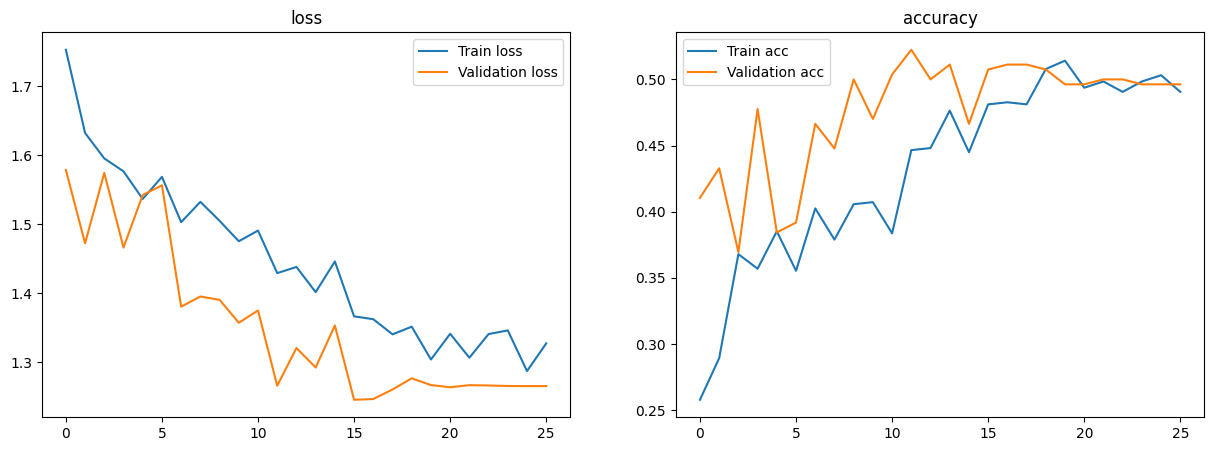

In [61]:
plot_history(history_2)

In [ ]:
plot_compare_history(history, "Basic CNN", history_2, "Data Augmentation")

In [62]:
def predictImage(url, model):

  # Takes an image and a model

  img = url
  img = img_to_array(img)/255
  img = img.reshape((-1, 225, 225, 3))
  res = model.predict(img)
  print(res)
  return res  

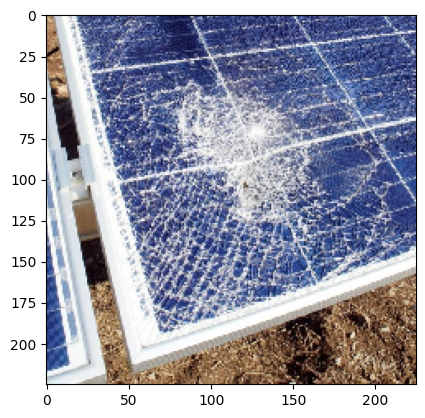

In [63]:
img_test = img = load_img(f"test_model_val.jpeg", target_size=(225, 225),keep_aspect_ratio=True)
plt.imshow(img_test)

In [64]:
predictImage(img_test,model_2)

1/1 [==============================] - 0s 79ms/step
[[0.19008212 0.2024669  0.15522155 0.15871161 0.14446497 0.14905278]]


array([[0.19008212, 0.2024669 , 0.15522155, 0.15871161, 0.14446497,
        0.14905278]], dtype=float32)

In [65]:
class_names

['bird', 'clean', 'dust', 'electrical', 'physical_damaged', 'solar']